In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from wdtools import *

In [3]:
setID = 'Set007'; nm_to_add = 4972

In [36]:
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add, raw=False)

In [14]:
wd.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'DocumentName', 'DecisionLink', 'is_batch_file', 'status_name',
       'received_date', 'Coord-Source', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [5]:
matched = gpd.read_file(os.path.join(inpath + '\\output\\matched\\', f'matched_records_{setID}_edited.shp'))

In [6]:
unmatched = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_2.csv'))

In [7]:
matched.columns

Index(['wdID', 'trsqq', 'parcel_id', 'notes', 'lots', 'lot', 'ORTaxlot',
       'record_ID', 'geometry'],
      dtype='object')

In [8]:
# unmatched records based on wdID
unmatchedIDs = wd[~wd.wetdet_delin_number.isin(matched.wdID.unique())].wetdet_delin_number.unique()
len(unmatchedIDs)

16

In [9]:
# unmatched records based record IDs
unmatchedwdIDs = unmatched.wetdet_delin_number.unique()
len(unmatchedwdIDs)

22

In [10]:
unmatched.shape

(52, 25)

In [11]:
all([wdID in unmatchedwdIDs for wdID in unmatchedIDs])

True

In [37]:
df = wd[(wd.wetdet_delin_number.isin(matched.wdID.unique()))&(wd.notes=='')]

In [31]:
df.shape

(253, 25)

16.3% digitized, 180 records remained, expected to be done in about 45 hours...
WD2009-0289
index = 75
     county       trsqq parcel_id   latitude   longitude  record_ID notes  \
74  Clatsop  05N10W04DD       900  45.941572 -123.920602       5047         

   missinglot              status_name is_batch_file  
74          N  Approved with Revisions             N  
Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...c
16.7% digitized, 179 records remained, expected to be done in about 45 hours...
WD2009-0323
index = 77
     county       trsqq parcel_id   latitude   longitude  record_ID notes  \
76  Clatsop  06N10W22BA       200  45.994758 -123.912449       5049         

   missinglot       status_name is_batch_file  
76          N  Completed by DSL             Y  
Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...c
17.2% digitized, 178 records remained, expected to be done in about 45 hours...
WD2009

Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...c
24.7% digitized, 162 records remained, expected to be done in about 41 hours...
WD2010-0440
index = 124
      county     trsqq parcel_id  latitude  longitude  record_ID notes  \
123  Clatsop  05N08W00       401   45.9257  -123.6924       5096         

    missinglot       status_name is_batch_file  
123          N  Completed by DSL             Y  
Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...c
25.1% digitized, 161 records remained, expected to be done in about 40 hours...
WD2011-0047
index = 125
      county      trsqq parcel_id  latitude  longitude  record_ID notes  \
124  Clatsop  07N09W08C       600   46.1026  -123.8373       5097         
125  Clatsop   08N09W31      3100   46.1393  -123.8469       5098         

    missinglot       status_name is_batch_file  
124          N  Completed by DSL             Y  
125          N  Completed by 

C:\Users\clid1852\AppData\Anaconda3\envs\geoenv\lib\site-packages\geopandas\plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...c
26.0% digitized, 159 records remained, expected to be done in about 40 hours...
WD2011-0133
index = 134
      county       trsqq parcel_id  latitude  longitude  record_ID notes  \
133  Clatsop  06N10W15CA      5500   46.0022  -123.9113       5106         

    missinglot       status_name is_batch_file  
133          N  Withdrawn by DSL             N  
Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...c
26.5% digitized, 158 records remained, expected to be done in about 40 hours...
WD2011-0225
index = 136
      county       trsqq         parcel_id  latitude  longitude  record_ID  \
135  Clatsop  08N10W22DA  1001, 1002, 1100    46.163   -123.904       5108   

    notes missinglot status_name is_batch_file  
135                N    Approved             N  
Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...

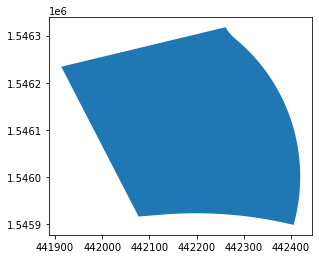

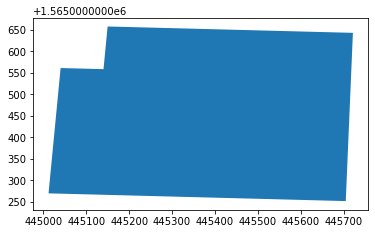

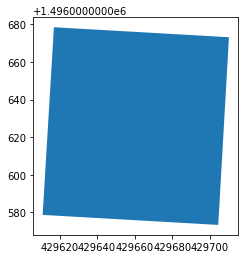

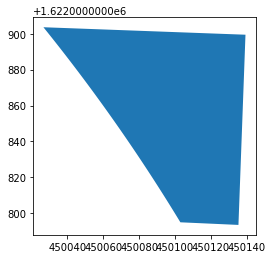

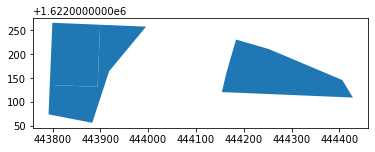

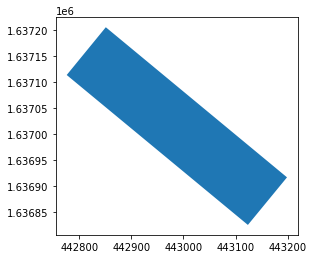

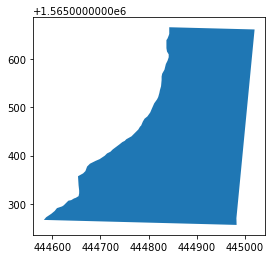

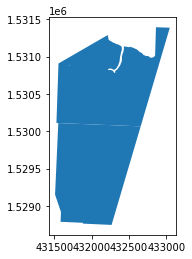

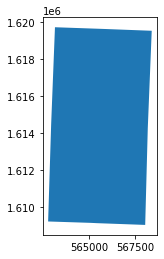

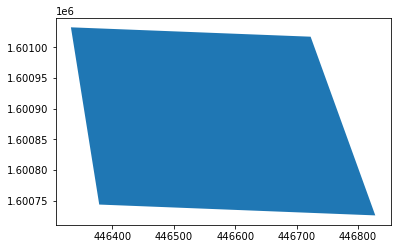

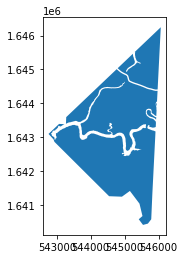

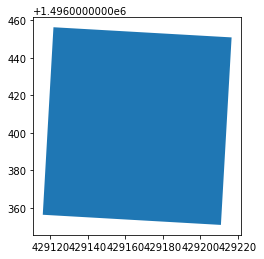

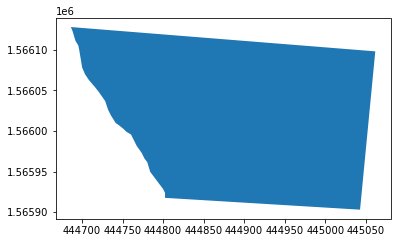

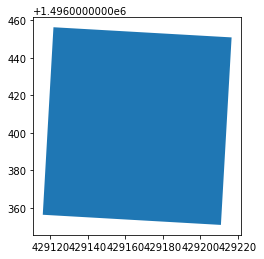

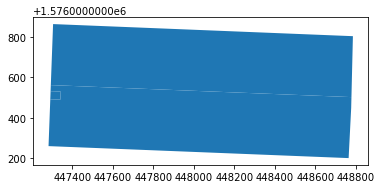

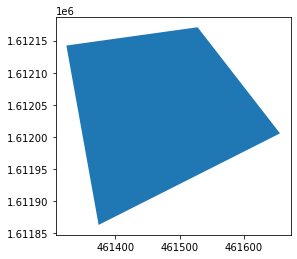

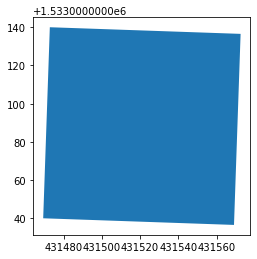

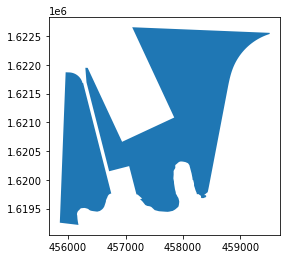

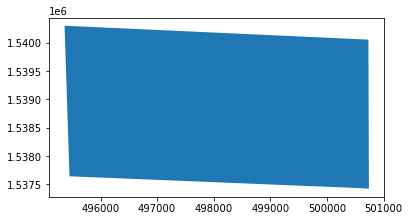

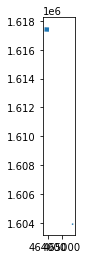

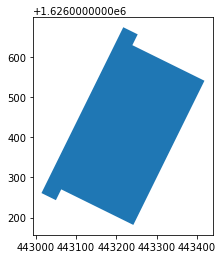

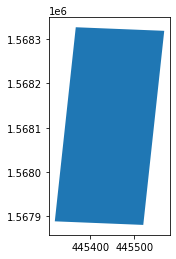

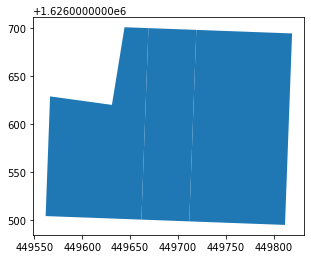

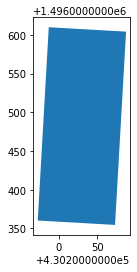

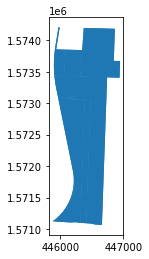

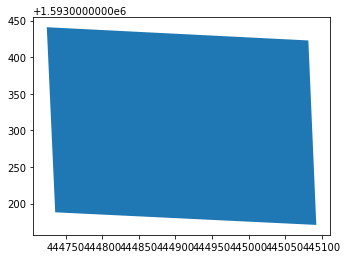

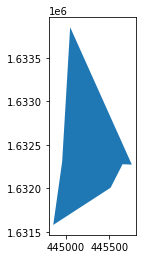

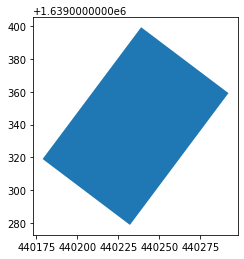

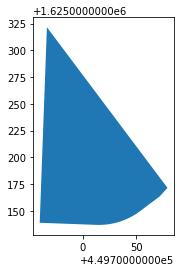

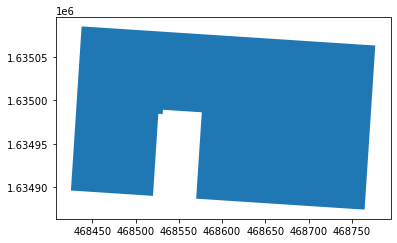

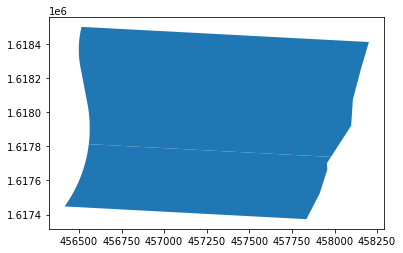

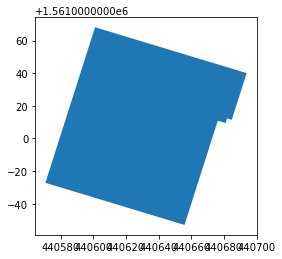

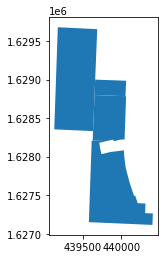

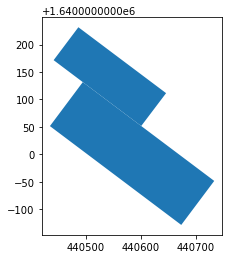

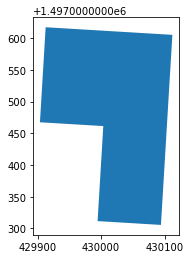

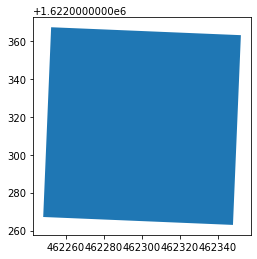

In [38]:
toAdd = review_loop_r1(df=df, 
                       partial=True, 
                       idx=True, 
                       wd_id='WD2009-0280',
                       plot=True,
                       gdf=matched)
print(toAdd)

In [12]:
review_loop_r1(df=unmatched, partial=True, idx=True) #, wd_id='WD2022-0489'

0.0% digitized, 22 records remained, expected to be done in about 18 hours...
WD2013-0217
index = 1
     county       trsqq parcel_id   latitude   longitude  record_ID notes  \
0   Clatsop    08N10W14      MANY  46.177288 -123.905843       5155  Many   
1   Clatsop    08N10W15      MANY  46.177288 -123.905843       5159  Many   
2   Clatsop  08N10W22BD      MANY  46.177288 -123.905843       5158  Many   
3   Clatsop  08N10W22BA      MANY  46.177288 -123.905843       5157  Many   
4   Clatsop  08N10W22AB      MANY  46.177288 -123.905843       5156  Many   
5   Clatsop  08N10W23BD      MANY  46.177288 -123.905843       5162  Many   
6   Clatsop  08N10W22AC      MANY  46.177288 -123.905843       5154  Many   
7   Clatsop   08N10W15D      MANY  46.177288 -123.905843       5153  Many   
8   Clatsop    08N10W26      MANY  46.146847 -123.868485       5152  Many   
9   Clatsop    08N10W23      MANY  46.177288 -123.905843       5163  Many   
10  Clatsop    08N10W26      MANY  46.177288 -123.905

In [12]:
outpath = r'L:\NaturalResources\Wetlands\Local Wetland Inventory\WAPO\EPA_2022_Tasks\Task 1 WD Mapping\output'
partial = pd.read_csv(outpath + f'\\to_review\\partial_matched_{setID}.csv')

In [14]:
partial.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [13]:
len(partial.wetdet_delin_number.unique())

132

In [15]:
skips

array(['WD2022-0594', 'WD2022-0585', 'WD2022-0388', 'WD2022-0618',
       'WD2022-0427', 'WD2022-0482'], dtype=object)

In [19]:
skips = wd[(wd.status_name.isin(["Withdrawn by DSL", "Withdrawn by Applicant"])) & (wd.is_batch_file=='Y')].wetdet_delin_number.unique()
IDstoCheck = [wdID for wdID in partial.wetdet_delin_number.unique() if wdID not in list(unmatchedwdIDs) + list(skips)]

In [18]:
toCheck_df = partial[partial.wetdet_delin_number.isin(IDstoCheck)]

In [19]:
toCheck_df.to_csv(outpath + f'\\to_review\\tomap_{setID}.csv', index=False)

In [20]:
toCheck_df = pd.read_csv(outpath + f'\\to_review\\tomap_{setID}.csv')

In [22]:
toadd = review_loop_r1(df=toCheck_df, partial=True, idx=True, wd_id='WD2022-0564') #, wd_id='WD2022-0669'

87.5% digitized, 16 records remained, expected to be done in about 13 hours...
WD2022-0565
index = 256
        county       trsqq parcel_id  latitude  longitude  record_ID    notes  \
255  Tillamook  01S10W02CC      700p  45.51307 -123.88538       4919  Partial   

    missinglot  
255          N  
Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...c
88.3% digitized, 15 records remained, expected to be done in about 12 hours...
WD2022-0645
index = 257
        county       trsqq       parcel_id   latitude   longitude  record_ID  \
256  Tillamook  01N10W34AC  800p,901p, ROW  45.531766 -123.893983       4920   

            notes missinglot  
256  ROW, Partial          N  
Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...c
89.1% digitized, 14 records remained, expected to be done in about 11 hours...
WD2022-0680
index = 258
        county       trsqq                                     parcel_id  \
257

In [10]:
tocheckIDs = ['WD2017-0266']

In [11]:
review_loop_r1(wdid_list=tocheckIDs, partial=True, idx=True, wddf=wd)

0.0% digitized, 1 records remained, expected to be done in about 1 hours...
WD2017-0266
index = 1
    county     trsqq parcel_id   latitude   longitude  record_ID notes  \
214   Linn  10S03W15   I-5 ROW  44.703675 -123.050415       3093   ROW   

    missinglot  
214          N  
Press 'p' to pause or any key to stop...p
Press 'a' to add the wd record or 'c' to continue...c
